# Projeto 2 - Ciência dos Dados



**Grupo:** Daniel Parnes, Luca Oshiro Camargo e Tomás Selaibe Pires - Turma C

Carregando bibliotecas

In [344]:
%matplotlib inline
#%matplotlib notebook
%reset -f

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [345]:
import statsmodels.api as sm

Lendo a base de dados selecionada para o Projeto

In [346]:
filename = 'cardetails.xlsx'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o desenvolvimento do projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que ele foi baixado corretamente?')

Encontrei o arquivo cardetails.xlsx, tudo certo para prosseguir com o desenvolvimento do projeto!


In [347]:
df = pd.read_excel(filename)
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [348]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [349]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [350]:
df.isnull().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [351]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [352]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [353]:
database = df.dropna()
database.describe()

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Comparando as descrições da base de dados antes e depois da remoção das linhas com valores vazios, percebemos que a diferença entre eles era proporcionalmente pequena. Vimos que o preço médio após a remoção dos valores vazios aumentou e a quilometragem rodada média diminuiu, indicando que os carros removidos eram de menor valor e mais rodados. Como o número de carros removidos representa em torno de 3% da base de dados e tendo os pontos mencionados acima em mente, podemos removê-los da base de dados.

**Limpando e substituindo dados**

Substituindo os valores da coluna owner:

In [354]:
database['owner'].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64


First Owner $\Rightarrow 1$

Second Owner $\Rightarrow 2$

Third Owner $\Rightarrow 3$

Fourth & Above Owner $\Rightarrow 4$

Test Drive Car $\Rightarrow 5$

In [355]:
database['owner'] = database['owner'].astype('category')
database['owner'] = database['owner'].cat.reorder_categories(['First Owner', 'Second Owner',
       'Third Owner', 'Fourth & Above Owner','Test Drive Car'], ordered=True)
database['owner'].cat.categories = [1, 2, 3, 4, 5]

C:\Users\tprfe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\tprfe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Substituindo os valores da coluna fuel:

In [356]:
database['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

Diesel $\Rightarrow 1$

Petrol $\Rightarrow 2$

CNG $\Rightarrow 3$

LPG $\Rightarrow 4$

In [357]:
database['fuel'] = database['fuel'].astype('category')
database['fuel'] = database['fuel'].cat.reorder_categories(['Diesel', 'Petrol',
       'CNG', 'LPG'], ordered=True)
database['fuel'].cat.categories = [1, 2, 3, 4]

C:\Users\tprfe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\tprfe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Substituindo os valores da coluna transmission:

In [358]:
database['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

Manual $\Rightarrow 1$

Automatic $\Rightarrow 2$

In [359]:
database['transmission'] = database['transmission'].astype('category')
database['transmission'] = database['transmission'].cat.reorder_categories(['Manual', 'Automatic'], ordered=True)
database['transmission'].cat.categories = [1, 2]

C:\Users\tprfe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\tprfe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Substituindo os valores da coluna seller_type:

In [360]:
database['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

Individual $\Rightarrow 1$

Dealer $\Rightarrow 2$

Trustmark Dealer $\Rightarrow 3$

In [361]:
database['seller_type'] = database['seller_type'].astype('category')
database['seller_type'] = database['seller_type'].cat.reorder_categories(['Individual', 'Dealer','Trustmark Dealer'], ordered=True)
database['seller_type'].cat.categories = [1, 2, 3]

C:\Users\tprfe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\tprfe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Limpando a coluna mileage**

Nessa limpeza, retiramos a unidade dos valores das linhas, transformando-os em float e convertemos km/kg para kmpl usando a densidade média da gasolina.

In [362]:
mileage = []
for i in database['mileage']:
    alvos = ["kmpl", "km/kg"]
    kmkg = 1
    if "km/kg" in i:
        kmkg = 0.7475 #Conversor pela densidade média
    for unidade in alvos:
        i = i.replace(unidade, "")
        i = i.replace(" ","")
    i = float(i)*kmkg
    mileage.append(i)
database['mileage'] = pd.Series(mileage)
database.head()

C:\Users\tprfe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


**Limpando a coluna engine**

Nessa limpeza, também retiramos a unidade dos valores das linhas, transformando-os em float.

In [363]:
engine = []
for i in database['engine']:
    i = i.replace('CC', "")
    i = i.replace(" ","")
    i = float(i)
    engine.append(i)
database['engine'] = pd.Series(engine)
database.head()

C:\Users\tprfe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


**Limpando a coluna max_power**

Nessa limpeza, fizemos o mesmo procedimento das demais colunas.

In [364]:
max_power = []
for i in database['max_power']:
    i = i.replace('bhp', "")
    i = i.replace(" ","")
    i = float(i)
    max_power.append(i)
database['max_power'] = pd.Series(max_power)
database.head()

C:\Users\tprfe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


**Limpando a coluna Torque**

Nessa limpeza, fizemos o mesmo procedimento das demais colunas.

In [365]:
torque = []
for i in database['torque']:
    fator = 1  #Conversor de Kgmf em Nm (x10 caso seja kgmf)
    if 'kg' in i and 'Nm' not in i:
        fator = 10  
    novoi = i[:3]
    alvo = ['@','N','n','m','K','k','g','(',')']
    for letra in alvo:
        novoi = novoi.replace(letra,"")
        novoi = novoi.replace(" ","")
    novoi = float(novoi)*fator
    torque.append(novoi)
database['torque'] = torque
database['torque'].head()

C:\Users\tprfe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


0    190.0
1    250.0
2    120.0
3    220.0
4    110.0
Name: torque, dtype: float64

**Criando uma coluna da idade do carro**

In [366]:
database['car_age'] = 2020 - database.year
database.head()

C:\Users\tprfe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,190.0,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,250.0,5.0,6
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,120.0,5.0,14
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,220.0,5.0,10
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,110.0,5.0,13


In [381]:
database = database.dropna()

In [382]:
database.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
car_age          0
dtype: int64

**Análise exploratória**

In [383]:
import seaborn as sns

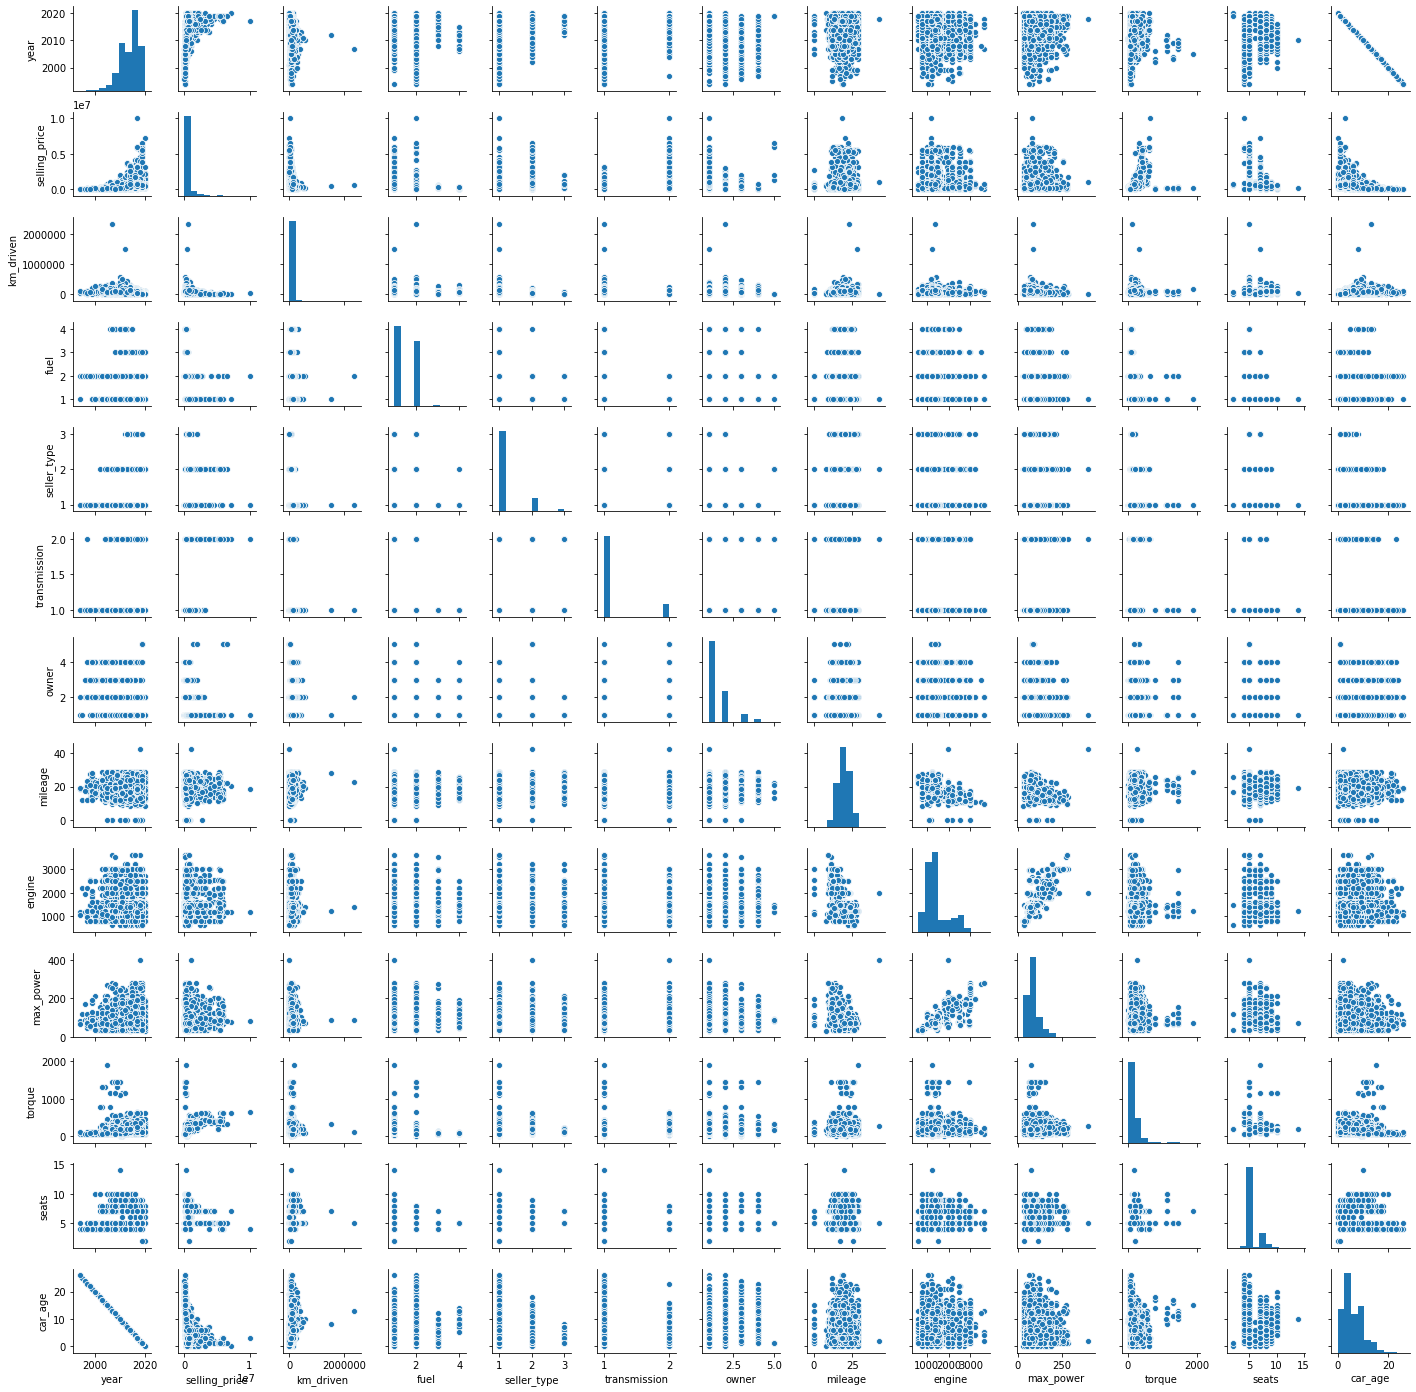

In [384]:
sns.pairplot(database,height=1.5)

**Analisando apenas o preço pelas outras variáveis**

In [385]:
database.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'car_age'],
      dtype='object')

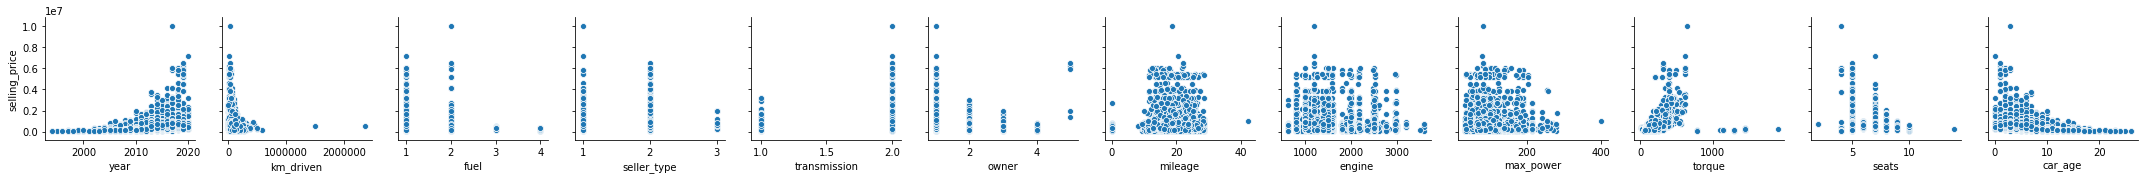

In [386]:
sns.pairplot(database, x_vars=['year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'car_age'], y_vars=['selling_price'])

**Analisando individualmente as variáveis que mostraram influenciar o preço**

Analisando as variáveis quantitativas apenas

In [387]:
### Função utilitária para fazer a regressão com constante adicionada - desenvolvida em aula

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [388]:
X = database[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'car_age']]
Y = database['selling_price']

results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     738.9
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:01:36   Log-Likelihood:            -1.1362e+05
No. Observations:                7688   AIC:                         2.273e+05
Df Residuals:                    7680   BIC:                         2.273e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.1570      1.037    -31.987      0.000     -35.189     -31.125
year         431.8283     36.746     11.752      0.000     359.797     503.860
km_driven     -1.5574      0.145    -10.713      0.000      -1.842      -1.272
mileage    -1705.7952   2195.747     -0.777      0.437   -6010.059    2598.469
engine       -14.5971     23.012     -0.634      0.526     -59.707      30.512
max_power    603.5624    285.753      2.112      0.035      43.408    1163.717
torque      3696.1785     68.683     53.815      0.000    3561.541    3830.816
seats      -6.888e+04   8043.798     -8.563      0.000   -8.46e+04   -5.31e+04
car_age    -6.741e+04   2099.810    -32.102      0.000   -7.15e+04   -6.33e+04
==============================================================================
Omnibus:                     5160.115   Durbin-Watson:                   1.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           215823.259
Skew:                           2.668   Prob(JB):                         0.00
Kurtosis:                      28.402   Cond. No.                     3.92e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.02e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0, 0.5, 'Preço')

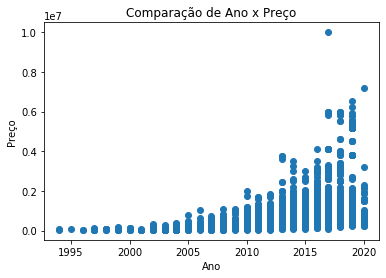

In [389]:
plt.scatter(database['year'],database['selling_price'])
plt.title('Comparação de Ano x Preço')
plt.xlabel('Ano')
plt.ylabel('Preço')

Text(0, 0.5, 'Preço')

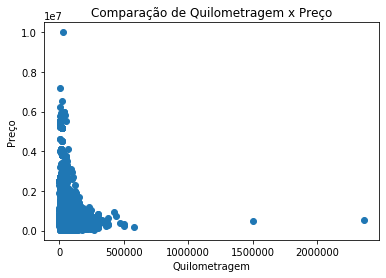

In [390]:
plt.scatter(database['km_driven'],database['selling_price'])
plt.title('Comparação de Quilometragem x Preço')
plt.xlabel('Quilometragem')
plt.ylabel('Preço')

Text(0, 0.5, 'Preço')

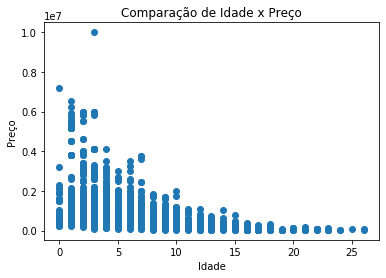

In [402]:
plt.scatter(database['car_age'],database['selling_price'])
plt.title('Comparação de Idade x Preço')
plt.xlabel('Idade')
plt.ylabel('Preço')

Text(0, 0.5, 'Preço')

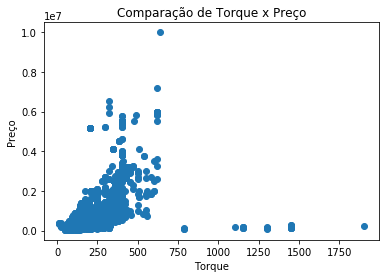

In [403]:
plt.scatter(database['torque'],database['selling_price'])
plt.title('Comparação de Torque x Preço')
plt.xlabel('Torque')
plt.ylabel('Preço')

Intuitivamente, a potência influenciaria no preço de um carro, mas isso não é evidenciado pelo gráfico abaixo. Vamos, posteriormente, comparar uma associação da potência e torque com o preço final do carro.

Text(0, 0.5, 'Preço')

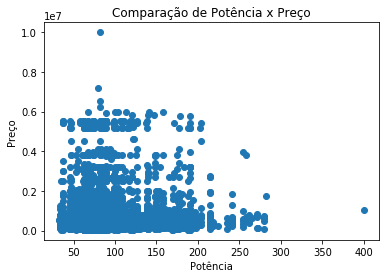

In [404]:
plt.scatter(database['max_power'],database['selling_price'])
plt.title('Comparação de Potência x Preço')
plt.xlabel('Potência')
plt.ylabel('Preço')

**Cruzamento 3D entre torque, potência e preço (em desenvolvimento)**

Utilizando a função elaborada em aula:

In [392]:
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import display

In [393]:
X2 = database[['max_power', 'torque']]
results2 = regress(Y,X2)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     1274.
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:01:53   Log-Likelihood:            -1.1450e+05
No. Observations:                7688   AIC:                         2.290e+05
Df Residuals:                    7685   BIC:                         2.290e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.422e+04   2.56e+04     -2.116      0.034   -1.04e+05   -3986.055
max_power    455.1990    226.305      2.011      0.044      11.579     898.819
torque      3681.9894     73.081     50.383      0.000    3538.731    3825.248
==============================================================================
Omnibus:                     5110.134   Durbin-Watson:                   1.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202326.494
Skew:                           2.647   Prob(JB):                         0.00
Kurtosis:                      27.568   Cond. No.                         718.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [394]:
beta0 = results2.params[0]
beta1 = results2.params[1]
beta2 = results2.params[2]  

In [398]:
def f(feature1, feature2):
    return beta0 + beta1*feature1 + beta2*feature2

In [399]:
Y = database['selling_price']
feature1 = database['max_power']
feature2 = database['torque']

npoints = 100
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)
fit_z = f(eixo_x, eixo_y)

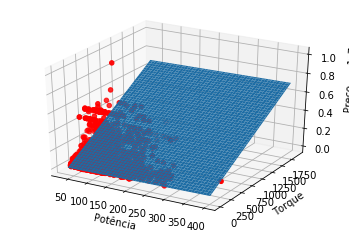

In [400]:
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, Y, color="r")
plt3d.set_xlabel("Potência")
plt3d.set_ylabel("Torque")
plt3d.set_zlabel("Preço")
plt.show()